## EDA Case Study Using Statistics

`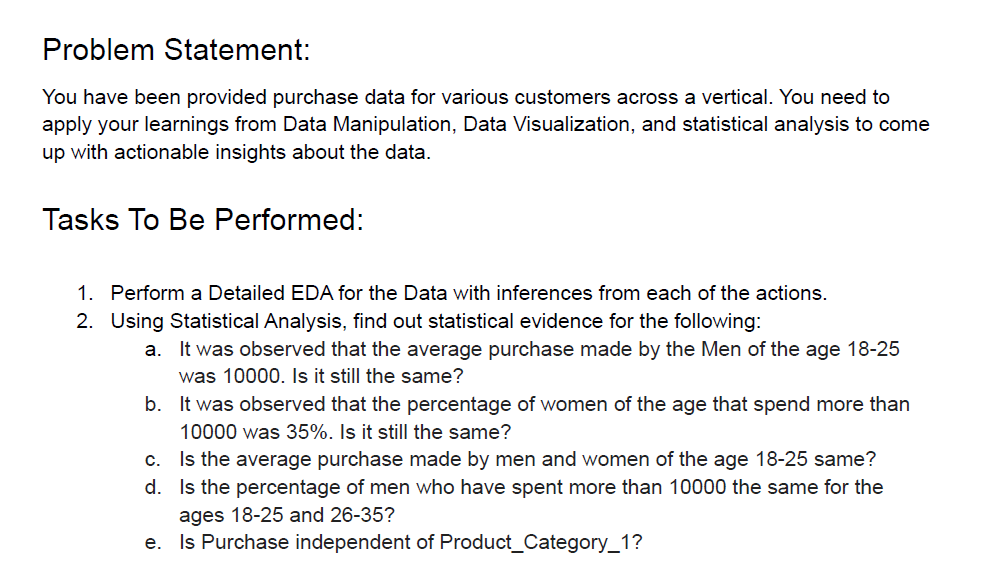

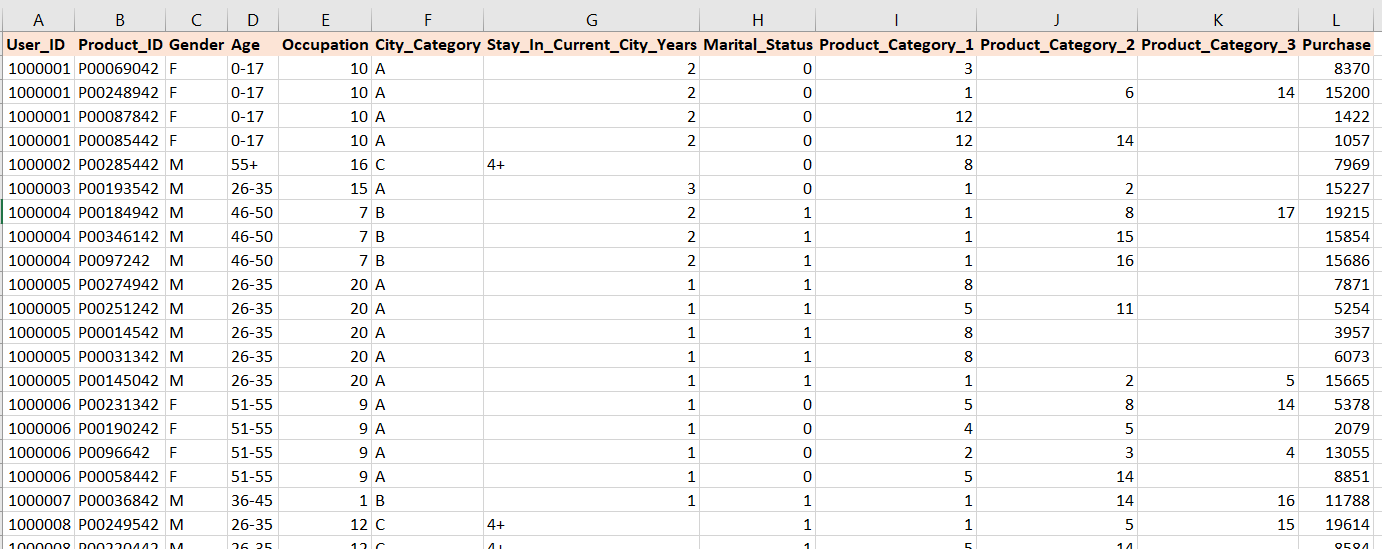

### Import the necessary libraries for the EDA

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Load the `purchase data`

In [3]:
data = pd.read_csv('train (1).csv')

In [13]:
data.sample(2).T

,440505,269020
User_ID,1001764,1005463
Product_ID,P00046142,P00343842
Gender,M,M
Age,18-25,36-45
Occupation,0,0
City_Category,B,B
Stay_In_Current_City_Years,1,3
Marital_Status,0,1
Product_Category_1,1,7
Product_Category_2,16.0,NaN


### Get basic `info` and `statistics` on the data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


### To quantify the missing data

In [14]:
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [16]:
data.isna().sum()/len(data)*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

- `31.5%` and `69.6%` data is missing in Product_Category_2 and Product_Category_3 respectively

### Since the data is large in size and quite a lot of data is missing for  Product_Category_2 and Product_Category_3, dropping the null values 

#### Action - 1 # Drop the column `Product_category_3

In [18]:
data.drop('Product_Category_3', axis=1, inplace=True)

In [19]:
data.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200


#### Action-2 # Drop the NAs

In [20]:
data.dropna(inplace=True)

In [22]:
data.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

###  Q.1. Total purchases done by Gender

In [26]:
data.shape

(376430, 11)

In [30]:
summary_1 = data.groupby('Gender')['Purchase'].sum().reset_index()

In [38]:
summary_1['Purchase']/10**6

0     857.585124
1    2932.696388
Name: Purchase, dtype: float64

- Female is buying worth ~ $857 M

- Male is buying worth ~ $2932 M

### Follow-up: Find the number of records in the data by `Gender`

In [42]:
data.groupby('Gender').agg(
Distinct_count_users = ('User_ID', 'nunique')).reset_index()

,Gender,Distinct_count_users
0,F,1666
1,M,4225


In [43]:
data.groupby('Gender')['Purchase'].mean().reset_index()

,Gender,Purchase
0,F,9369.443068
1,M,10293.774616


### Q.2 Total purchases by Category - PC_1 & PC_2

In [45]:
summ_2 = data.groupby('Product_Category_1')['Purchase'].sum().reset_index()

In [46]:
summ_2.sort_values(by='Purchase', ascending=False)

,Product_Category_1,Purchase
0,1,1823778343
4,5,553078604
7,8,397711382
5,6,309715659
1,2,257318625
2,3,201268699
9,10,91582972
10,11,55939073
14,15,49510856
3,4,27086843


### Q.3 Total purchases by Gender & Age

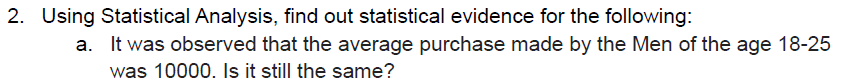

In [47]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase'],
      dtype='object')

In [48]:
data['Age'].unique()

array(['0-17', '26-35', '46-50', '51-55', '36-45', '18-25', '55+'],
      dtype=object)

In [53]:
criteria = data['Gender']=='M' #filtering for gender Male

In [54]:
data[criteria].groupby('Age')['Purchase'].mean()

Age
0-17     10060.898061
18-25    10362.808712
26-35    10267.325044
36-45    10279.436984
46-50    10132.926567
51-55    10554.779067
55+      10328.426899
Name: Purchase, dtype: float64

In [52]:
data[criteria]['Gender'].unique()

array(['M'], dtype=object)

### One Sample Test For Mean 
let's Suppose, it was observed that the average purchase made by the Men of the age 18-25 was 10000. Is it still the same? 

In [59]:
data['Age'].unique()

array(['0-17', '26-35', '46-50', '51-55', '36-45', '18-25', '55+'],
      dtype=object)

In [67]:
criteria = (data['Gender']=='M') & (data['Age']=='18-25') 

In [68]:
data[criteria].shape

(52293, 11)

In [69]:
new_data = data[criteria].sample(1000, random_state=25) #sample data

In [70]:
new_data.shape

(1000, 11)

In [71]:
from bioinfokit.analys import stat #run the t-test 

In [72]:
res=stat()
res.ttest(df=new_data, test_type=1, res='Purchase', mu=10000)

In [73]:
print(res.summary)


One Sample t-test 

------------------  --------------
Sample size          1000
Mean                10393.6
t                       2.34881
Df                    999
p value (one-tail)      0.00951379
p value (two-tail)      0.0190276
Lower 95.0%         10064.8
Upper 95.0%         10722.3
------------------  --------------


### Two Sample test for Means
Is the average purchase made by men and women of the age 18-25 same?

- Compare the means of two groups - `Men` and `Women`

- Null Hypothesis - H0: Average spends for men and women are equal
    
- Alternate Hypothesis - H1: Average spends for men and women are not equal

#### Action - Create two samples namely - sample_men and sample_women

criteria - Age `18-25`

In [74]:
criteria_1 = (data['Gender']=='M') & (data['Age']=='18-25') 
criteria_2 = (data['Gender']=='F') & (data['Age']=='18-25') 

In [75]:
sample_men = data[criteria_1].sample(500, random_state=15)
sample_women = data[criteria_2].sample(500, random_state=20)

In [77]:
sample_men.shape

(500, 11)

In [78]:
sample_women.shape

(500, 11)

In [79]:
from scipy.stats import ttest_ind

In [80]:
t_stat_2, p_val_2 = ttest_ind(sample_men['Purchase'], sample_women['Purchase'], equal_var=False)

In [81]:
print(t_stat_2, p_val_2)

5.160005735888307 2.9874923243102316e-07


In [83]:
sample_men['Purchase'].mean(),  sample_women['Purchase'].mean()

(10617.398, 8954.168)

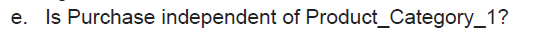

### Pearson Correlation 

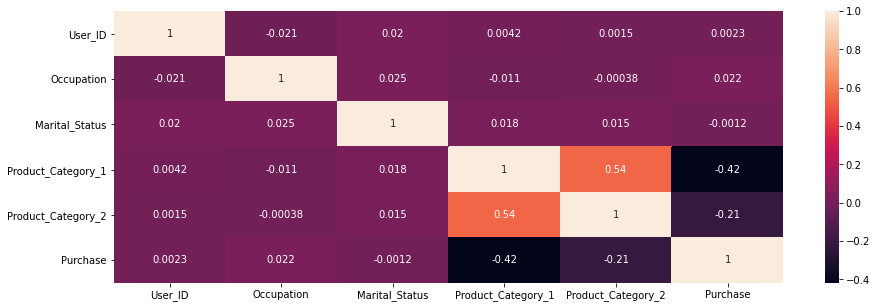

In [85]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(), annot=True)
plt.show()

- 0.7 - 1 : Strong Correlation
- 0.4 - 0.7: Moderate Correlation
- 0 - 0.4: Weak Correlation

In [86]:
data['Product_Category_1'].unique()

array([ 1, 12,  5,  4,  2,  6,  3,  8, 11, 13, 15, 10,  7,  9, 14],
      dtype=int64)

In [87]:
data.shape

(376430, 11)